In [1]:
import sys
sys.path.append('../')
import numpy as np
import torch

import matplotlib.pyplot as plt
from torchqc.states import QuantumState
from torchqc.common_functions import get_density_matrix
from torchqc.operators import Operator
from torchqc.dynamics import TDSE, lindblad_equation, TDSE_numeric
from torchqc.common_functions import basis_operators

* Start from basis state $\ket{0}$

In [2]:
dims = 3
basis_states = QuantumState.basis(dims)
state = basis_states[0]
state.normalize()

QuantumState (dims = 3 , tensor: tensor([[1.+0.j],
        [0.+0.j],
        [0.+0.j]], dtype=torch.complex128))

* Simulate dynamics with TDSE

In [3]:
T = 10
Dt = 0.01
ξ = 1
time = np.arange(0, T + Dt, Dt, dtype = np.float32)
Ω = 1
Δ = 0.5

projectors, transitions, labels = basis_operators(dims)
proj1, _, proj3 = projectors
trans12, trans13, trans23 = transitions
trans21 = trans12.dagger()
trans32 = trans23.dagger()

H1 = (Ω / np.sqrt(2)) * (trans12 + trans21 + trans23 + trans32)
H2 = Δ * proj1
H3 = (4 * ξ - Δ) * proj3
H = H1 + H2 + H3

matrices = H.matrix.expand(len(time), -1, -1)

hamiltonian = Operator(dims, matrices)

states = TDSE(state, hamiltonian, time, Dt)

* Print Rabi oscillations

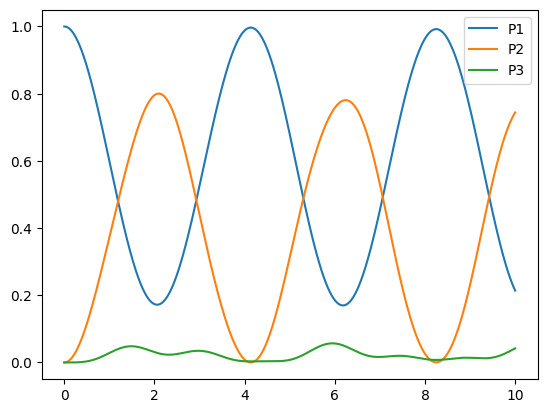

In [4]:
populations = np.array([(torch.abs(state.state_tensor)**2).numpy() for state in states])

fig, ax = plt.subplots()

ax.plot(time, populations[:,0], label = "P1")
ax.plot(time, populations[:,1], label = "P2")
ax.plot(time, populations[:,2], label = "P3")
ax.legend()

In [5]:
states = TDSE_numeric(state, hamiltonian, time, Dt)

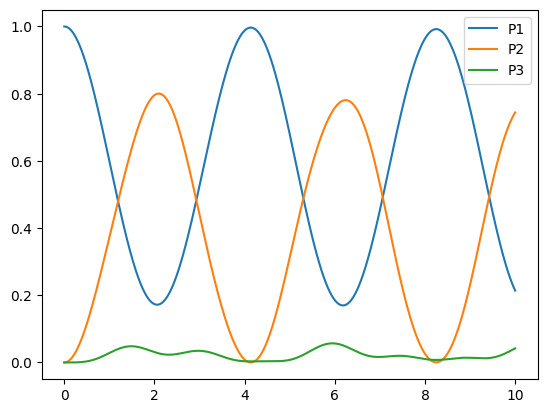

In [6]:
populations = np.array([(torch.abs(state.state_tensor)**2).numpy() for state in states])

fig, ax = plt.subplots()

ax.plot(time, populations[:,0], label = "P1")
ax.plot(time, populations[:,1], label = "P2")
ax.plot(time, populations[:,2], label = "P3")
ax.legend()

* Simulate dynamics with von-Neumann equations

In [8]:
rho = get_density_matrix(state)
_, states = lindblad_equation(rho, hamiltonian, time, Dt)
P1 = np.array([torch.real(state.matrix[0][0]) for state in states])
P2 = np.array([torch.real(state.matrix[1][1]) for state in states])
P3 = np.array([torch.real(state.matrix[2][2]) for state in states])

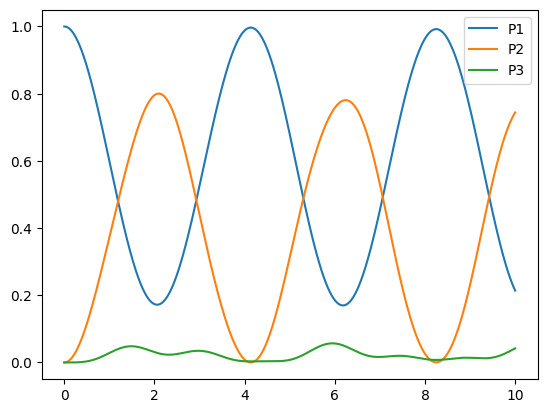

In [9]:
fig, ax = plt.subplots()

ax.plot(time, P1, label = "P1")
ax.plot(time, P2, label = "P2")
ax.plot(time, P3, label = "P3")
ax.legend()